In [1]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
import keras

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import IPython
print('iPython:', IPython.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

numpy: 1.14.3
scipy: 1.1.0
matplotlib: 2.2.2
iPython: 6.4.0
scikit-learn: 0.19.1


In [5]:
import keras
print('keras: ', keras.__version__)

# optional
import theano
print('Theano: ', theano.__version__)

import tensorflow as tf
print('Tensorflow: ', tf.__version__)

keras:  2.1.6


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Theano:  1.0.1
Tensorflow:  1.8.0


In [6]:
import librosa, IPython.display as ipd
import scipy, theano as th, time, keras
from scipy.special import expit

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout # , AutoEncoder
# from keras.layers import containers
from keras.layers.noise import GaussianNoise
import keras.optimizers

In [8]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)

In [9]:
import librosa, IPython.display as ipd
import scipy, theano as th, time, keras
from scipy.special import expit

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout # , AutoEncoder
# from keras.layers import containers
from keras.layers.noise import GaussianNoise
import keras.optimizers

In [11]:
model = Sequential()
model.add(Dense(input_dim=12, output_dim=13, activation='relu'))
model.add(Dense(output_dim=13, activation='relu'))
model.add(Dense(output_dim=12, activation='softmax'))

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, activation="relu", units=13)`
  
C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=13)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=12)`
  after removing the cwd from sys.path.


In [12]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True, decay=1e-3)

In [13]:
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [14]:
X_train = scipy.randn(1000, 12)
print(X_train.shape)

(1000, 12)


In [15]:
print(X_train[:5])

[[-0.21416674 -0.2507012   0.57385747  0.14108401 -0.63895514  0.21116967
   0.10937514 -1.72002399 -2.75917073 -0.41782509  0.04221164 -1.19097798]
 [ 0.02166202  0.72725965 -1.79109695  1.81203964  0.23186713  0.90545243
   0.26865045  0.30426953 -1.29049161  0.81156617  0.75571395  0.52045293]
 [-0.25408021  0.17381984 -1.00394352  0.56715946  0.62797763 -1.08637671
   0.44926256 -1.10855138 -0.59332988 -0.92125353  1.87132059 -0.1394267 ]
 [-0.28165816 -0.22069834 -0.49716937  0.91983625  0.22889562  0.64799753
   0.40307821 -0.72448495  1.2193353  -1.07281402 -1.75574072  1.71533881]
 [ 0.26390256 -0.14959773 -0.55619317 -0.68161213 -0.13442197  0.09340318
  -0.3236322   0.49822491  2.24099514  0.87363283 -1.96842188 -1.07244798]]


In [16]:
# y_train = scipy.array([
#    [float(x[0]*x[1] > 0), float(x[0]*x[1] <= 0)]
#    for x in X_train
# ])
# print('kid' if age < 13 else 'teenager' if age < 18 else 'adult')
y_train = scipy.array([
                      [numpy.mean(x)]
                      for x in X_train
                      ])
print(y_train.shape)

(1000, 1)


In [17]:
y_train[:5]

array([[-0.50951025],
       [ 0.27311211],
       [-0.11811849],
       [ 0.04849301],
       [-0.07634737]])

In [18]:
y_train = scipy.array([
                      [0 if (numpy.mean(x) < 0) else 1]
                      for x in X_train
                      ])
print(y_train.shape)

(1000, 1)


In [19]:
y_train[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

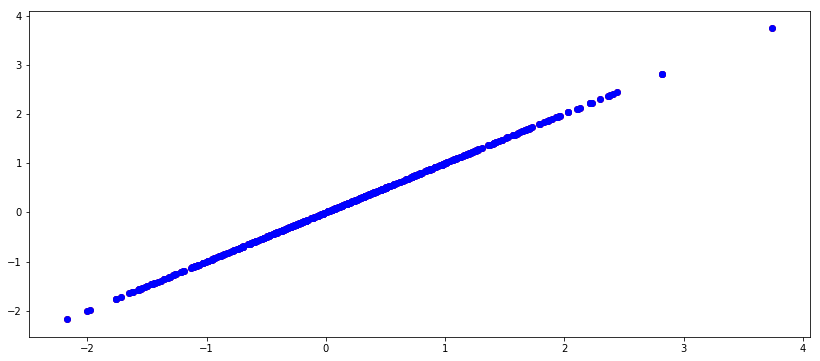

In [26]:
plt.scatter(X_train[y_train[:,0]>0,0], X_train[y_train[:,0]>0,0], c='r')
plt.scatter(X_train[y_train[:,0]>0,0], X_train[y_train[:,0]>0,0], c='b')

In [32]:
results = model.fit(X_train, y_train, no_epoch=50, batch_size=13)

TypeError: Unrecognized keyword arguments: {'no_epoch': 50}

In [ ]:
plt.plot(results.history['loss'])

In [ ]:
X_test = scipy.randn(1000, 12)

In [ ]:
y_test = model.predict(X_test)

In [ ]:
y_test.shape

In [ ]:
# plt.scatter(X_test[y_test[:, 0] < 0.5,0], X_test[y_test[:, 0] < 0.5,1], c='r')
# plt.scatter(X_test[y_test[:, 0] > 0.5,0], X_test[y_test[:, 0] > 0.5,1], c='b')

In [ ]:
# from keras.regularizers import l1, l2, ActivityRegularizer
from keras.layers import deserialize as layer_from_config

In [ ]:
model = Sequential()
model.add(AutoEncoder(
        encoder=containers.Sequential([
                #Dense(1025, 1000, activation='relu', activity_regularizer=ActivityRegularizer(l1=0.1)), 
                Dense(1025, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 30, activation='relu')
            ]),
        decoder=containers.Sequential([
                Dense(30, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 1025, activation='relu')
            ]),
        output_reconstruction=False))